In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Understanding

In [2]:
df = pd.read_csv("people_personality_types.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128061 entries, 0 to 128060
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 128061 non-null  float64
 1   Gender              128061 non-null  object 
 2   Education           128061 non-null  int64  
 3   Introversion Score  128061 non-null  float64
 4   Sensing Score       128061 non-null  float64
 5   Thinking Score      128061 non-null  float64
 6   Judging Score       128061 non-null  float64
 7   Interest            128061 non-null  object 
 8   Personality         128061 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 8.8+ MB


In [3]:
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


In [4]:
df.describe(include="all")

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
count,128061.000000,128061,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000,128061,128061
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,5,16
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,Unknown,ENFP
freq,NaN,70432,NaN,NaN,NaN,NaN,NaN,48835,34404
mean,26.349091,NaN,0.411156,4.996387,5.081893,4.988040,4.578293,NaN,NaN
std,4.908022,NaN,0.492045,2.888636,1.183236,2.886018,1.391582,NaN,NaN
min,18.000000,NaN,0.000000,0.000040,0.000000,0.000050,0.000000,NaN,NaN
25%,23.000000,NaN,0.000000,2.490710,4.315659,2.488630,3.709353,NaN,NaN
50%,25.000000,NaN,0.000000,4.993640,5.124169,4.984180,4.690653,NaN,NaN
75%,29.000000,NaN,1.000000,7.500170,5.892288,7.492550,5.561229,NaN,NaN


## Distribution of Object Columns

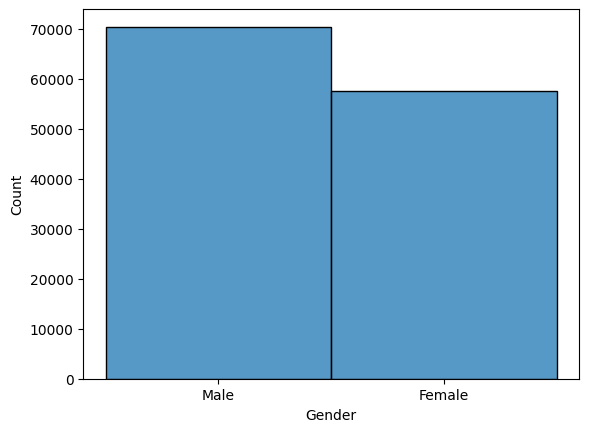

In [5]:
sns.histplot(df["Gender"]);

In [6]:
sorted_cat = df["Interest"].value_counts()
sorted_cat

Interest
Unknown       48835
Arts          25489
Others        21733
Technology    19103
Sports        12901
Name: count, dtype: int64

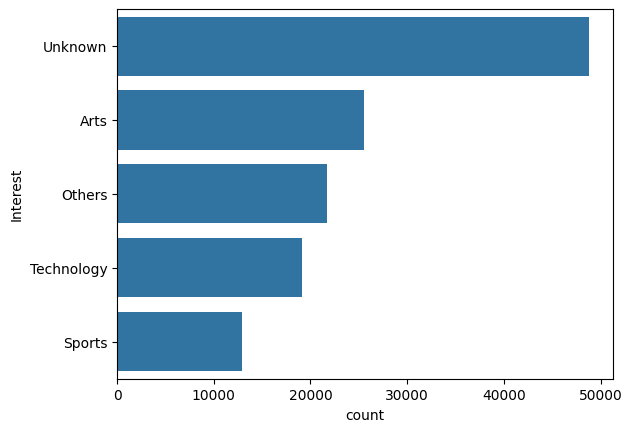

In [7]:
sns.countplot(df["Interest"],order=sorted_cat.index);

In [8]:
cat = df.groupby(["Personality", "Gender"])["Gender"].count().reset_index(name="Count")
cat

,Personality,Gender,Count
0,ENFJ,Female,1770
1,ENFJ,Male,2113
2,ENFP,Female,15509
3,ENFP,Male,18895
4,ENTJ,Female,1526
5,ENTJ,Male,1257
6,ENTP,Female,13537
7,ENTP,Male,11181
8,ESFJ,Female,237
9,ESFJ,Male,317


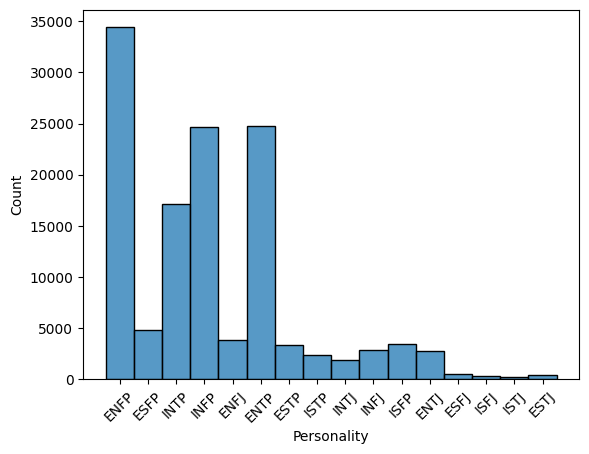

In [9]:
sns.histplot(df["Personality"]);
plt.xticks(rotation=45);

In [10]:
total_male = len(df[df["Gender"] == "Male"])
total_female = len(df[df["Gender"] == "Female"])

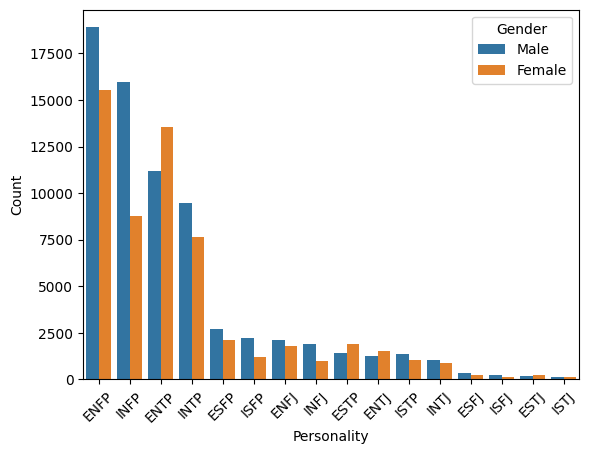

In [11]:
sns.barplot(data=cat.sort_values(by="Count", ascending=False), y="Count", x="Personality", hue="Gender")
plt.xticks(rotation=45);

## Distribution of Each Score

In [12]:
score_cols = df.loc[:, "Introversion Score":"Judging Score"] 
score_cols

,Introversion Score,Sensing Score,Thinking Score,Judging Score
0,9.47080,7.141434,6.03696,4.360278
1,5.85392,6.160195,0.80552,4.221421
2,7.08615,3.388433,2.66188,5.127320
3,2.01892,4.823624,7.30625,5.986550
4,9.91703,4.755080,5.31469,4.677213
...,...,...,...,...
128056,5.11456,7.764336,5.72341,2.686904
128057,3.00078,2.525392,4.71081,3.657814
128058,8.16219,3.433857,2.45531,5.541144
128059,9.37782,5.077443,1.79598,6.762643


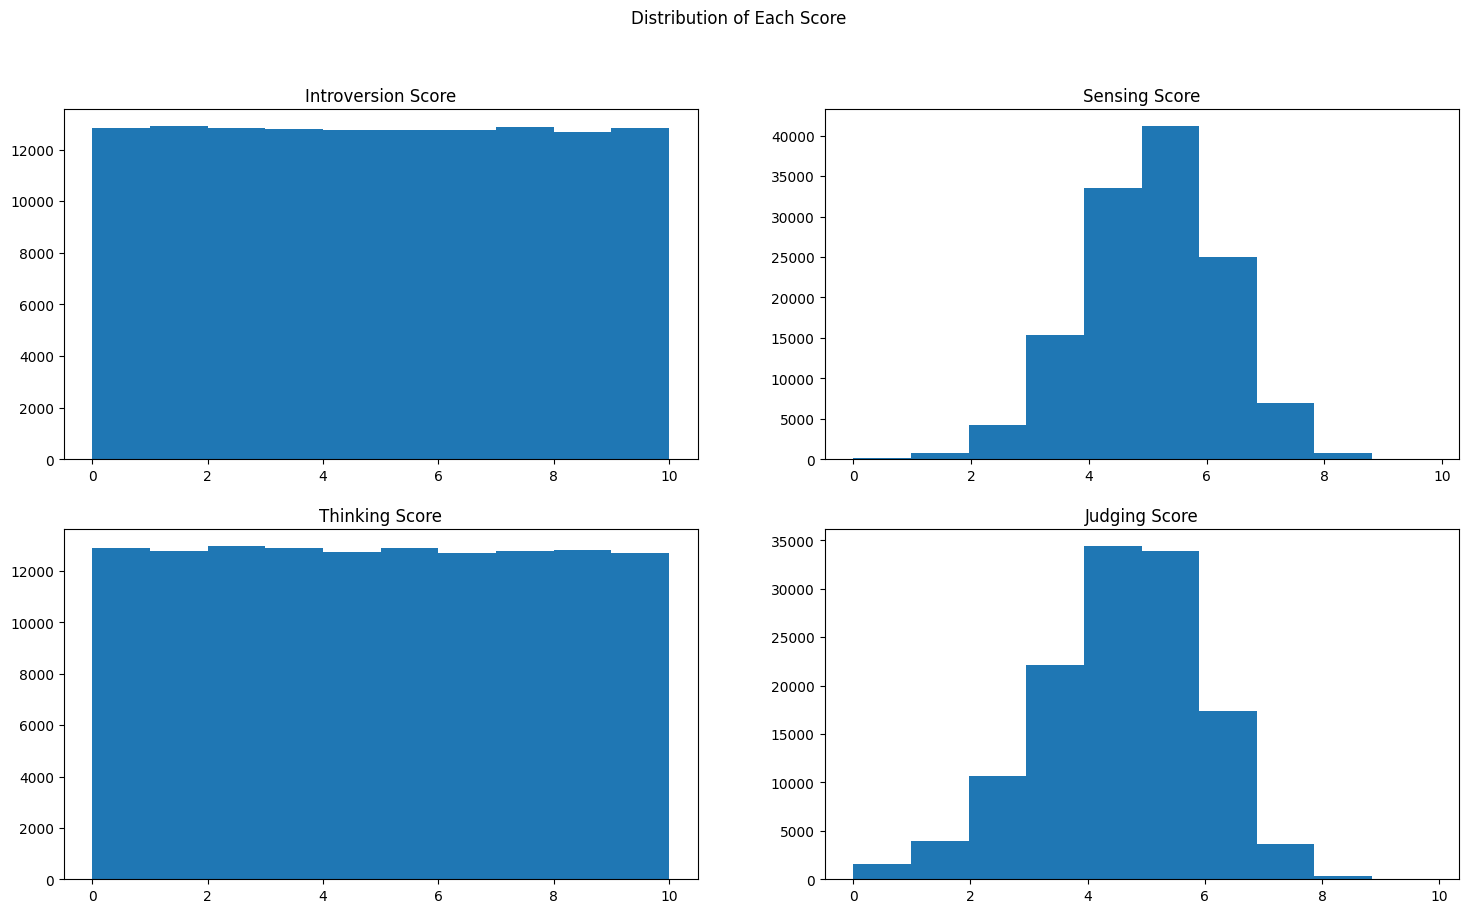

In [13]:
nrows = 2
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18,10))
fig.suptitle("Distribution of Each Score")

idx = 0
for i in range(nrows):
    for j in range(ncols):
        axes[i, j].hist(score_cols.iloc[:, idx])
        axes[i, j].set_title(score_cols.columns[idx])
        idx += 1

## Outlier

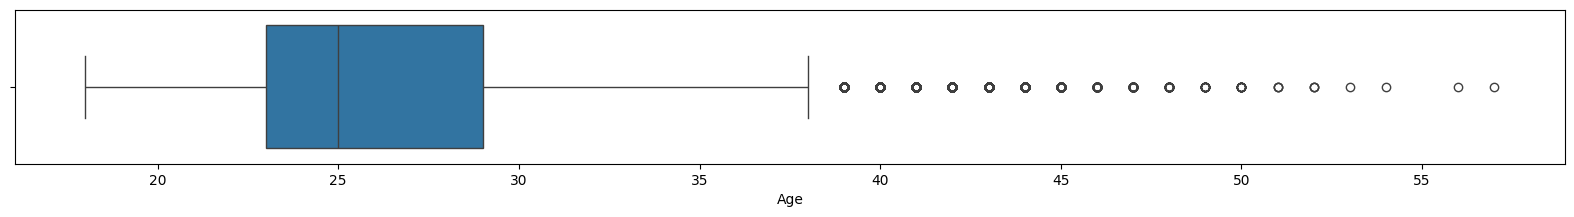

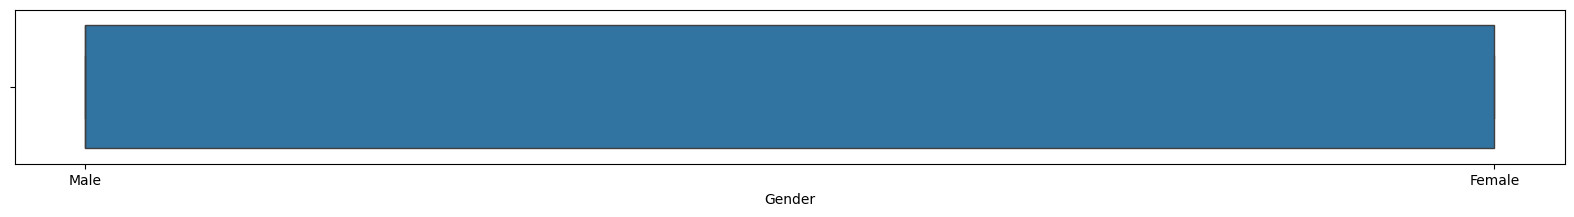

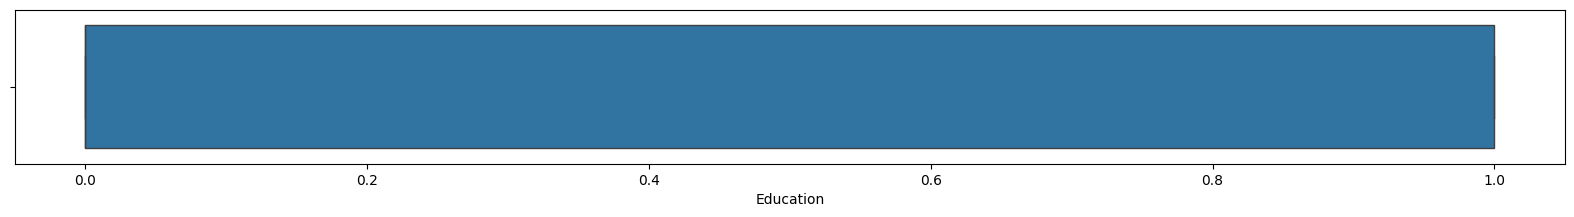

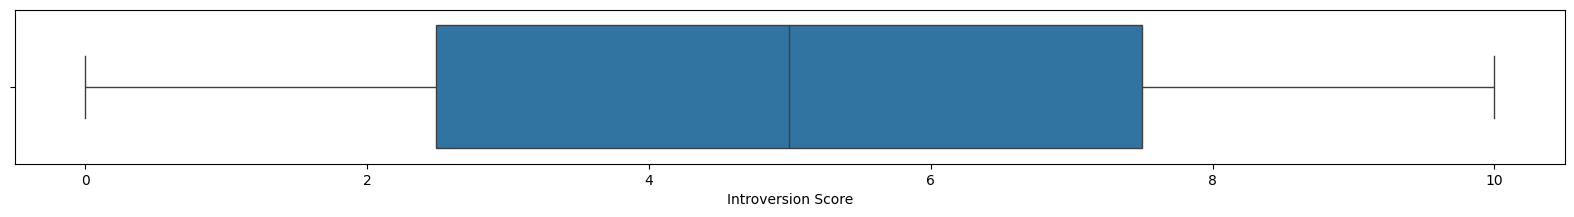

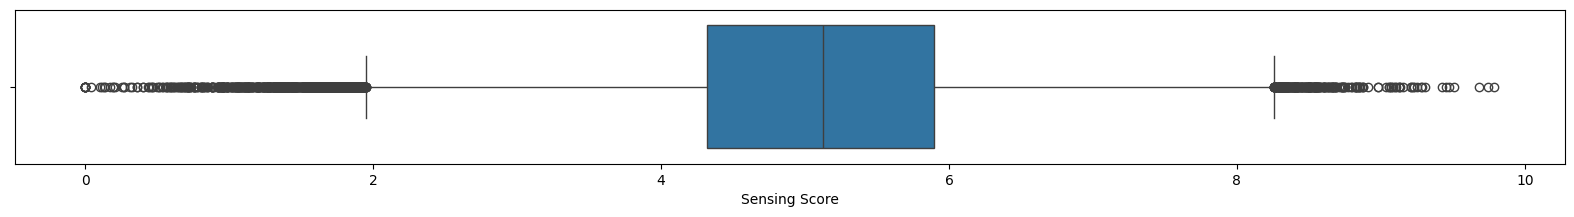

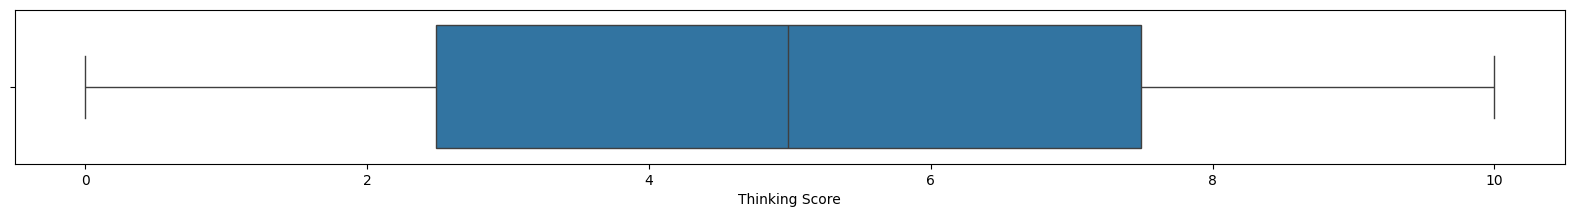

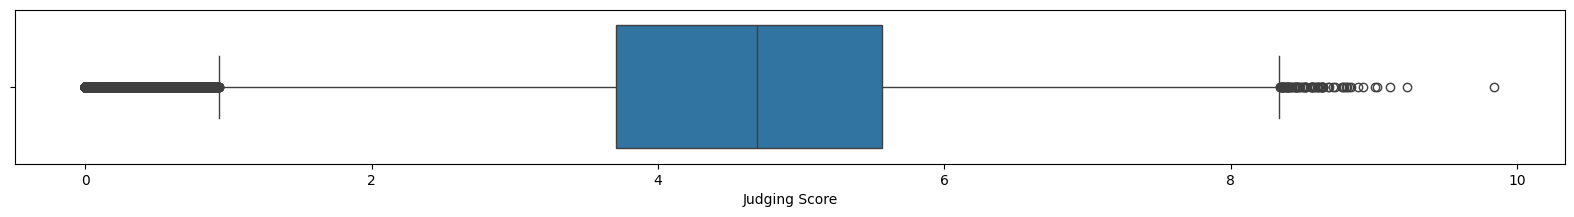

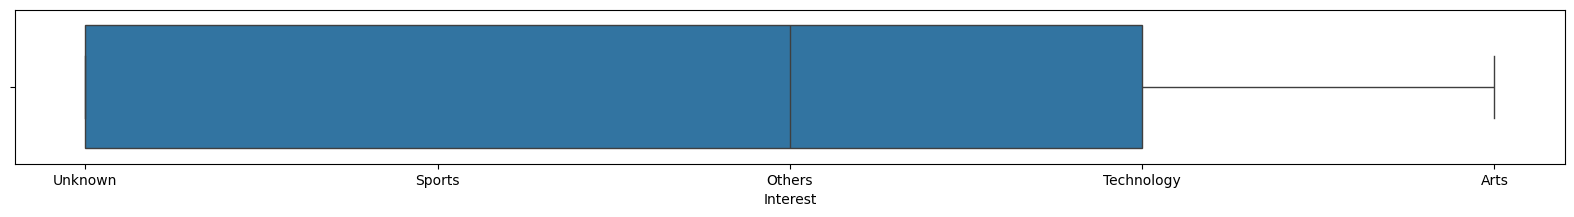

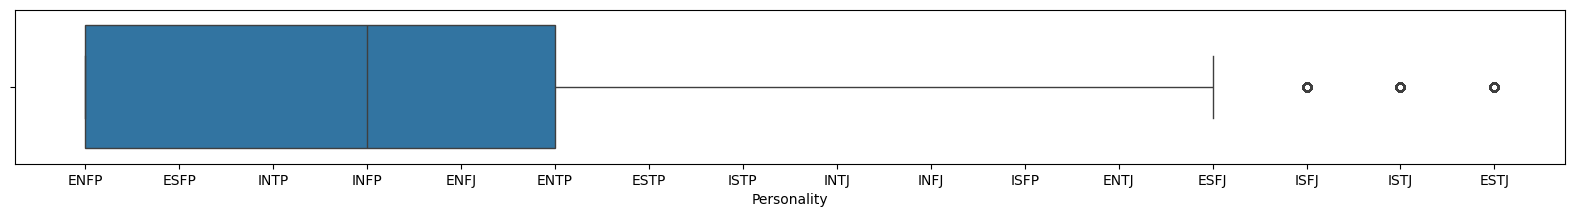

In [14]:
df_ = df
for col in df_:
    plt.figure(figsize=(20, 2))
    sns.boxplot(data=df_, x=col)

# Data Preparation

## Data Selection

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128061 entries, 0 to 128060
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 128061 non-null  float64
 1   Gender              128061 non-null  object 
 2   Education           128061 non-null  int64  
 3   Introversion Score  128061 non-null  float64
 4   Sensing Score       128061 non-null  float64
 5   Thinking Score      128061 non-null  float64
 6   Judging Score       128061 non-null  float64
 7   Interest            128061 non-null  object 
 8   Personality         128061 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 8.8+ MB


In [16]:
np.random.seed(21)
df_ = df.sample(int(df.shape[0] * .5)).reset_index(drop=True) # 50% of data
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64030 entries, 0 to 64029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 64030 non-null  float64
 1   Gender              64030 non-null  object 
 2   Education           64030 non-null  int64  
 3   Introversion Score  64030 non-null  float64
 4   Sensing Score       64030 non-null  float64
 5   Thinking Score      64030 non-null  float64
 6   Judging Score       64030 non-null  float64
 7   Interest            64030 non-null  object 
 8   Personality         64030 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 4.4+ MB


## Data Cleaning

In [17]:
# Check NULL
df_.isna().sum()

Age                   0
Gender                0
Education             0
Introversion Score    0
Sensing Score         0
Thinking Score        0
Judging Score         0
Interest              0
Personality           0
dtype: int64

In [18]:
# Check duplication
df_.duplicated().sum()

np.int64(0)

## Data Formatting

In [19]:
df_.tail()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
64025,28.0,Male,1,3.30674,5.552233,3.50733,7.172699,Unknown,INFP
64026,30.0,Male,1,0.72641,5.371572,8.65777,5.607663,Unknown,INTP
64027,26.0,Female,0,1.97811,4.142047,0.69404,4.058895,Unknown,INFP
64028,28.0,Female,0,2.50295,6.522119,3.73567,4.852855,Unknown,ISFP
64029,21.0,Female,0,8.10657,5.646437,2.21689,5.272962,Unknown,ENFP


In [20]:
def freq_encode_util(data, col: str, to_percent: bool=True):
    freq = (round(data[col].value_counts() / (len(data) if to_percent else 1), 3)).to_dict()
    data[col] = data[col].map(freq) 
    return freq, data

### Gender Encoding

In [21]:
df_["Gender"].value_counts()

Gender
Male      35118
Female    28912
Name: count, dtype: int64

In [22]:
# Using frequency encoding for gender
gender_freq, new_df = freq_encode_util(df_, "Gender", to_percent=True)
new_df

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,24.0,0.548,1,6.08935,4.902556,4.86676,0.646258,Technology,ENFP
1,21.0,0.452,0,1.65649,3.628253,6.99904,4.183552,Technology,INTP
2,28.0,0.548,0,1.34034,5.057613,5.89957,6.717068,Unknown,INFJ
3,27.0,0.548,1,5.95319,2.966196,5.79741,1.240337,Others,ENFP
4,20.0,0.548,0,6.07323,3.068499,0.08058,5.161780,Unknown,ENFP
...,...,...,...,...,...,...,...,...,...
64025,28.0,0.548,1,3.30674,5.552233,3.50733,7.172699,Unknown,INFP
64026,30.0,0.548,1,0.72641,5.371572,8.65777,5.607663,Unknown,INTP
64027,26.0,0.452,0,1.97811,4.142047,0.69404,4.058895,Unknown,INFP
64028,28.0,0.452,0,2.50295,6.522119,3.73567,4.852855,Unknown,ISFP


In [23]:
gender_freq

{'Male': 0.548, 'Female': 0.452}

### Interest Encoding

In [24]:
df_["Interest"].value_counts()

Interest
Unknown       24383
Arts          12790
Others        10907
Technology     9491
Sports         6459
Name: count, dtype: int64

In [25]:
interest_freq, new_df = freq_encode_util(data=new_df, col="Interest")
new_df

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,24.0,0.548,1,6.08935,4.902556,4.86676,0.646258,0.148,ENFP
1,21.0,0.452,0,1.65649,3.628253,6.99904,4.183552,0.148,INTP
2,28.0,0.548,0,1.34034,5.057613,5.89957,6.717068,0.381,INFJ
3,27.0,0.548,1,5.95319,2.966196,5.79741,1.240337,0.170,ENFP
4,20.0,0.548,0,6.07323,3.068499,0.08058,5.161780,0.381,ENFP
...,...,...,...,...,...,...,...,...,...
64025,28.0,0.548,1,3.30674,5.552233,3.50733,7.172699,0.381,INFP
64026,30.0,0.548,1,0.72641,5.371572,8.65777,5.607663,0.381,INTP
64027,26.0,0.452,0,1.97811,4.142047,0.69404,4.058895,0.381,INFP
64028,28.0,0.452,0,2.50295,6.522119,3.73567,4.852855,0.381,ISFP


In [26]:
interest_freq

{'Unknown': 0.381,
 'Arts': 0.2,
 'Others': 0.17,
 'Technology': 0.148,
 'Sports': 0.101}

### Personality Encoding

In [27]:
new_df["Personality"].value_counts()

Personality
ENFP    17368
ENTP    12321
INFP    12222
INTP     8567
ESFP     2452
ENFJ     1921
ISFP     1752
ESTP     1633
INFJ     1433
ENTJ     1380
ISTP     1216
INTJ      950
ESFJ      286
ESTJ      200
ISFJ      193
ISTJ      136
Name: count, dtype: int64

In [28]:
# Using label
lb_personality = new_df["Personality"].unique()
dict_personality = {}
reminder = []
cnt = 0;

while cnt < len(lb_personality):
    tmp = np.random.randint(10, 99)
    if tmp in reminder:
        continue
    dict_personality[lb_personality[cnt]] = tmp
    reminder.append(tmp)
    cnt += 1

len(lb_personality), dict_personality

(16,
 {'ENFP': 34,
  'INTP': 30,
  'INFJ': 19,
  'INFP': 87,
  'ESTP': 79,
  'ENFJ': 88,
  'ENTP': 41,
  'ENTJ': 35,
  'INTJ': 46,
  'ESFP': 24,
  'ISTP': 48,
  'ESFJ': 17,
  'ISFP': 71,
  'ISTJ': 78,
  'ESTJ': 68,
  'ISFJ': 14})

In [29]:
new_df["Personality"] = new_df["Personality"].replace(dict_personality)
new_df

/tmp/ipykernel_208526/184222127.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df["Personality"] = new_df["Personality"].replace(dict_personality)


,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,24.0,0.548,1,6.08935,4.902556,4.86676,0.646258,0.148,34
1,21.0,0.452,0,1.65649,3.628253,6.99904,4.183552,0.148,30
2,28.0,0.548,0,1.34034,5.057613,5.89957,6.717068,0.381,19
3,27.0,0.548,1,5.95319,2.966196,5.79741,1.240337,0.170,34
4,20.0,0.548,0,6.07323,3.068499,0.08058,5.161780,0.381,34
...,...,...,...,...,...,...,...,...,...
64025,28.0,0.548,1,3.30674,5.552233,3.50733,7.172699,0.381,87
64026,30.0,0.548,1,0.72641,5.371572,8.65777,5.607663,0.381,30
64027,26.0,0.452,0,1.97811,4.142047,0.69404,4.058895,0.381,87
64028,28.0,0.452,0,2.50295,6.522119,3.73567,4.852855,0.381,71


In [30]:
new_df.to_csv("./encoded_data.csv", index=False)

### Scaling Features

In [31]:
# using robust scaler from scikit-learn
from sklearn.preprocessing import RobustScaler

In [32]:
new_df = pd.read_csv("./encoded_data.csv")
new_df.iloc[:, :8].columns

Index(['Age', 'Gender', 'Education', 'Introversion Score', 'Sensing Score',
       'Thinking Score', 'Judging Score', 'Interest'],
      dtype='object')

In [33]:
scaler = RobustScaler()
scaled_df = new_df
scaled_df.iloc[:, :8] = scaler.fit_transform(new_df.iloc[:, :8])
scaled_df

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,-0.166667,0.0,1,0.217416,-0.140964,-0.023651,-2.183945,-0.246445,34
1,-0.666667,-1.0,0,-0.669001,-0.948960,0.402485,-0.273534,-0.246445,30
2,0.500000,0.0,0,-0.732220,-0.042648,0.182756,1.094760,0.857820,19
3,0.333333,0.0,1,0.190189,-1.368748,0.162339,-1.863097,-0.142180,34
4,-0.833333,0.0,0,0.214193,-1.303882,-0.980169,0.254785,0.857820,34
...,...,...,...,...,...,...,...,...,...
64025,0.500000,0.0,1,-0.339009,0.270975,-0.295333,1.340836,0.857820,87
64026,0.833333,0.0,1,-0.854985,0.156423,0.733982,0.495596,0.857820,30
64027,0.166667,-1.0,0,-0.604688,-0.623179,-0.857569,-0.340858,0.857820,87
64028,0.500000,-1.0,0,-0.499739,0.885949,-0.249699,0.087941,0.857820,71


# Modelling

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Split data to test and train

In [35]:
X = scaled_df.iloc[:, :-1]
y = scaled_df["Personality"]

In [36]:
X.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest
0,-0.166667,0.0,1,0.217416,-0.140964,-0.023651,-2.183945,-0.246445
1,-0.666667,-1.0,0,-0.669001,-0.948960,0.402485,-0.273534,-0.246445
2,0.500000,0.0,0,-0.732220,-0.042648,0.182756,1.094760,0.857820
3,0.333333,0.0,1,0.190189,-1.368748,0.162339,-1.863097,-0.142180
4,-0.833333,0.0,0,0.214193,-1.303882,-0.980169,0.254785,0.857820


In [37]:
y

0        34
1        30
2        19
3        34
4        34
         ..
64025    87
64026    30
64027    87
64028    71
64029    34
Name: Personality, Length: 64030, dtype: int64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

## Model Fitting

In [39]:
clf = RandomForestClassifier(n_estimators=132)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=132)

In [40]:
y_preds = clf.predict(X_test)
diff = pd.DataFrame({"Actual": y_test, "Pred": y_preds})
diff

,Actual,Pred
14591,41,30
20631,30,30
45734,71,87
49296,34,34
12244,34,34
...,...,...
26813,87,87
50916,24,24
41100,34,87
8880,34,34


In [41]:
print(f"Accuracy: {round(accuracy_score(y_test, y_preds), 5) * 100}%")

Accuracy: 90.02%


## Save Model

In [42]:
import joblib

In [43]:
joblib.dump(clf, "models/mbti_clf.pkl")

['models/mbti_clf.pkl']

# Model Evaluation

## Classification Report

In [44]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

          14       0.79      0.69      0.73        54
          17       0.81      0.76      0.78        88
          19       0.87      0.88      0.88       405
          24       0.83      0.80      0.81       720
          30       0.89      0.90      0.89      2552
          34       0.92      0.93      0.93      5250
          35       0.92      0.88      0.90       406
          41       0.92      0.91      0.92      3761
          46       0.89      0.87      0.88       290
          48       0.82      0.79      0.81       369
          68       0.85      0.73      0.79        60
          71       0.85      0.81      0.83       548
          78       0.68      0.69      0.68        39
          79       0.85      0.80      0.82       509
          87       0.90      0.91      0.90      3570
          88       0.90      0.92      0.91       588

    accuracy                           0.90     19209
   macro avg       0.86   

# Deployment

Link Github: [hng011/people-personality-analysis](https://github.com/hng011/people-personality-analysis)
</br>
Link Streamlit: [streamlit-app](https://hidzappfvr8uujojfwpw5s9.streamlit.app/)

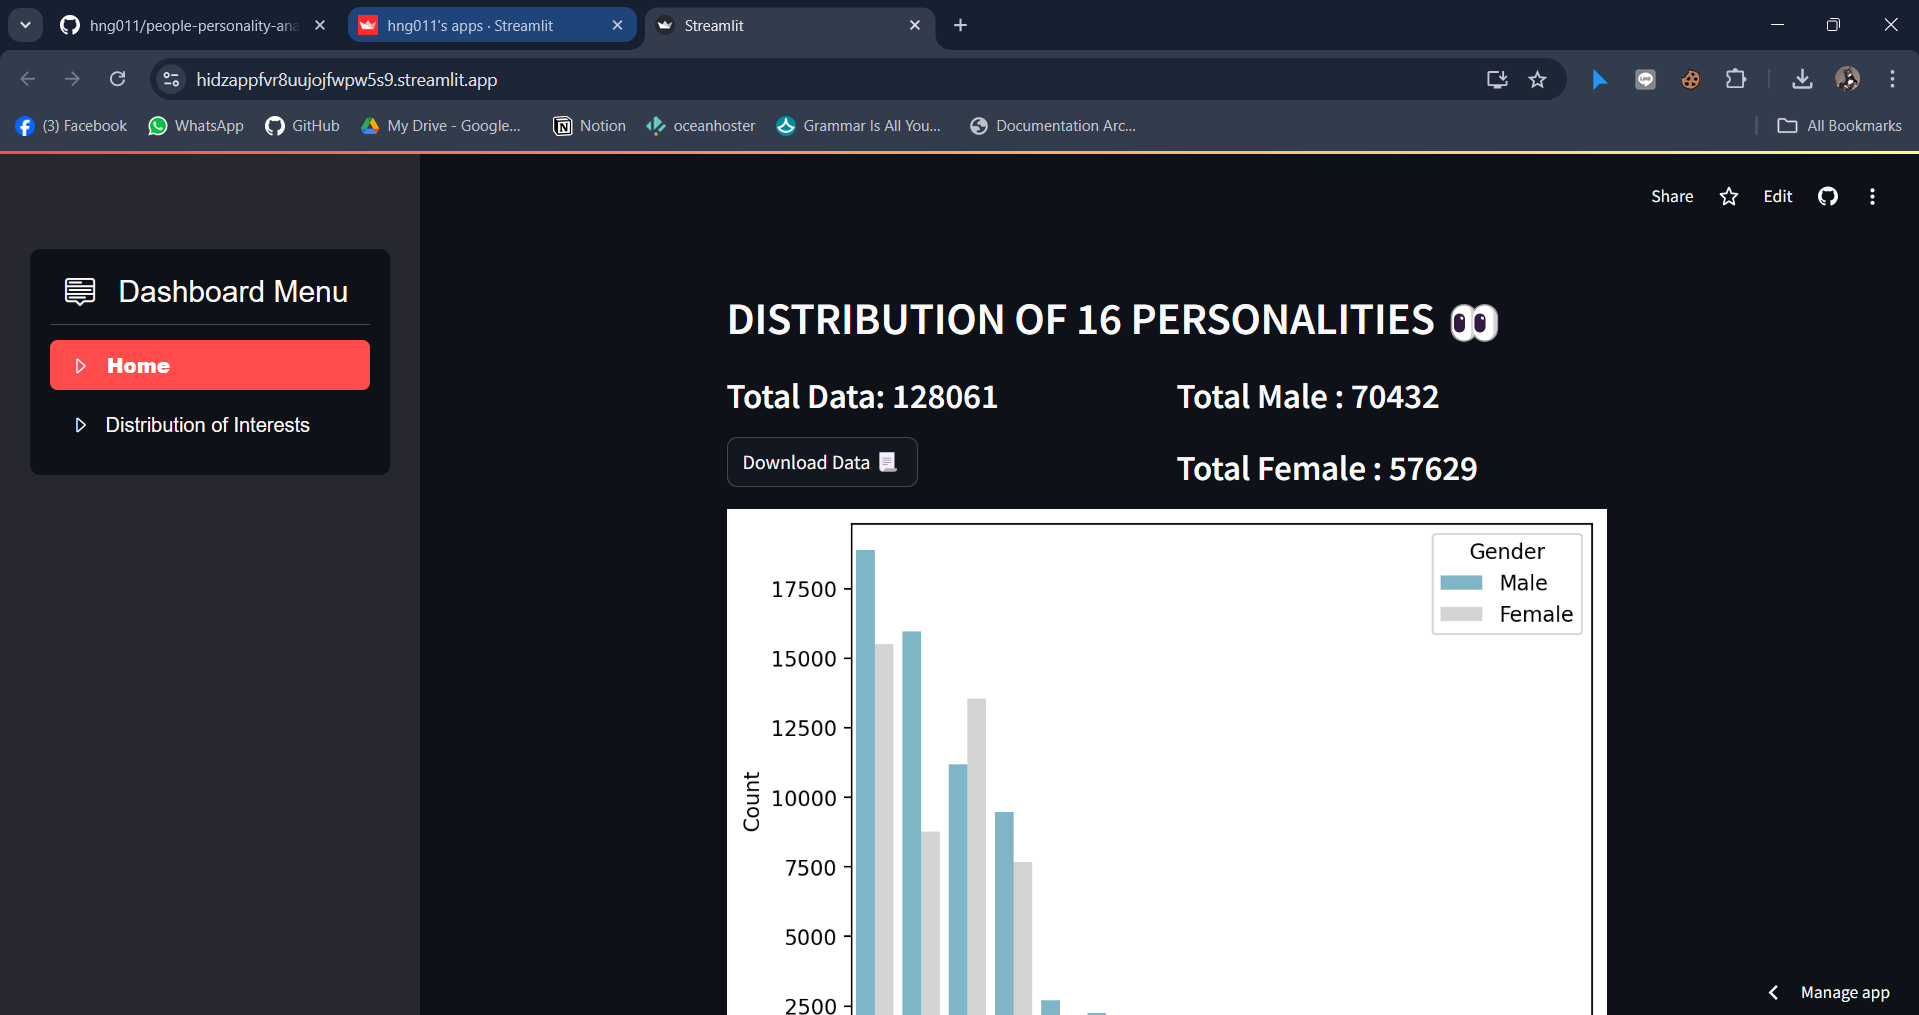

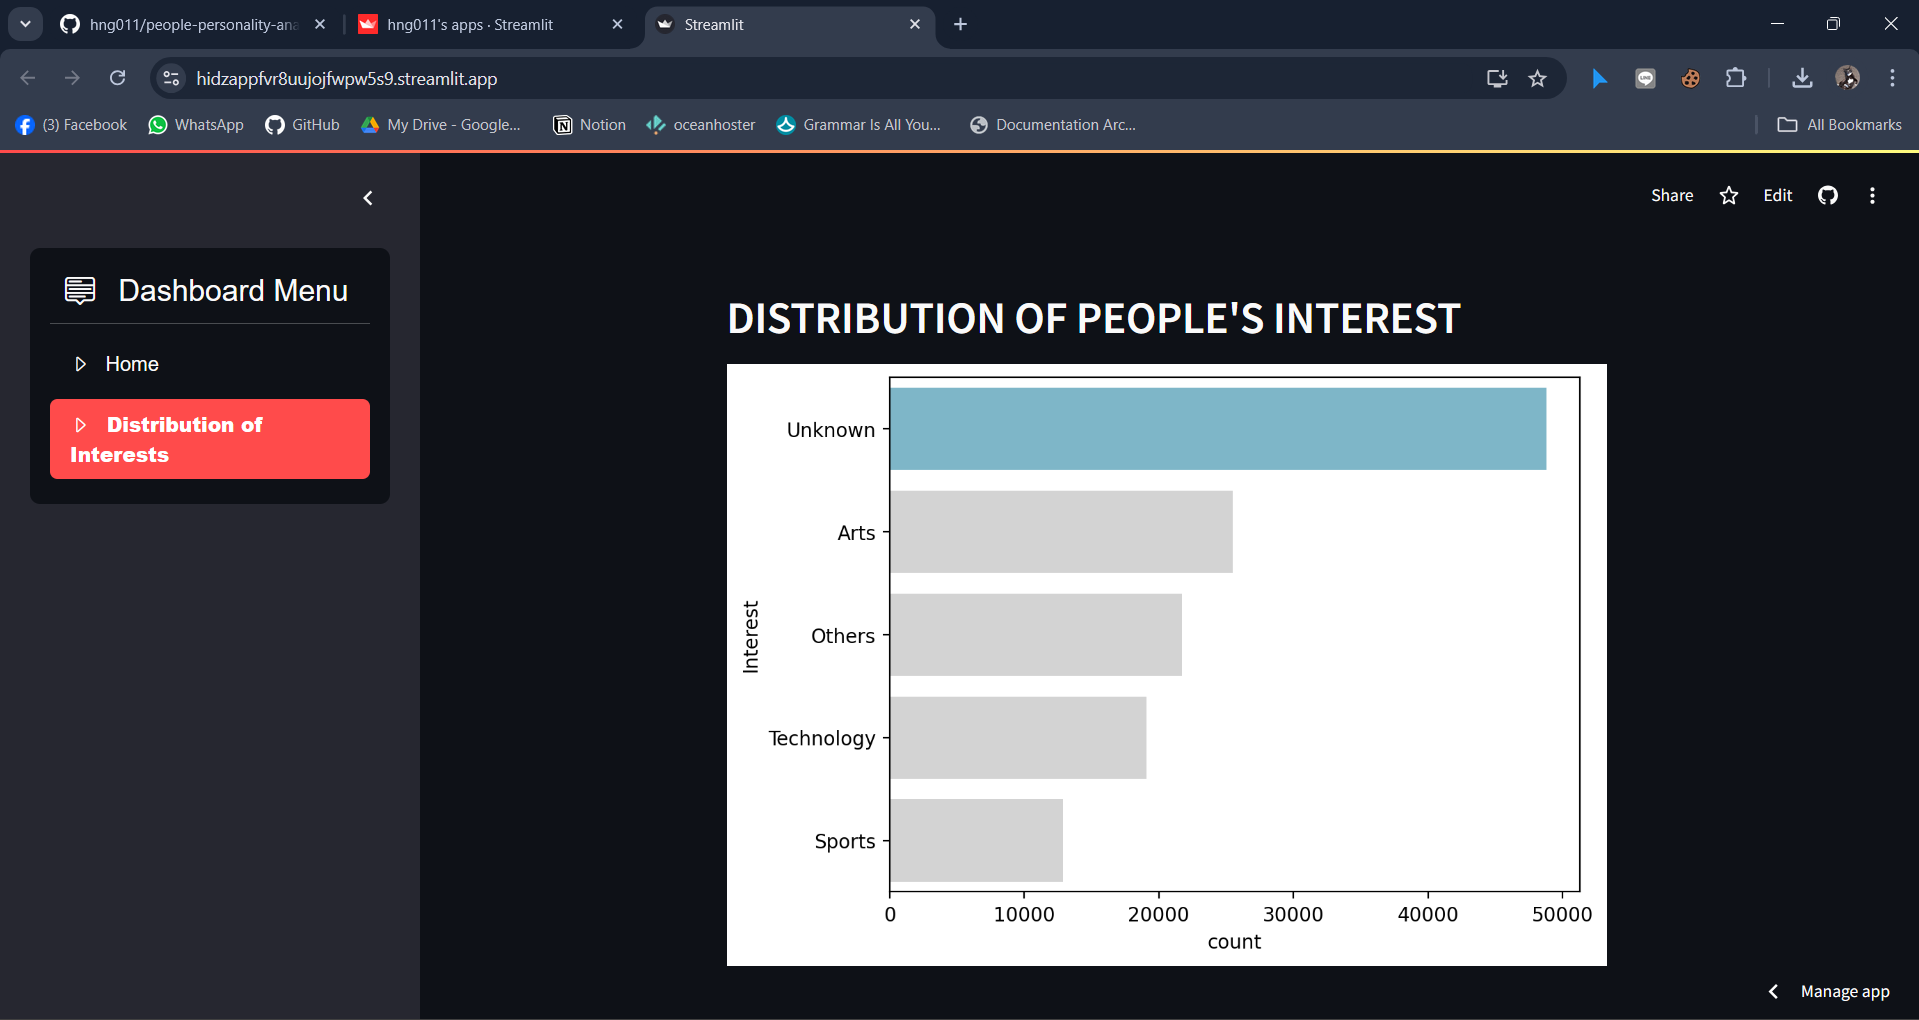

In [45]:
mdl = joblib.load("./models/mbti_clf.pkl")
mdl

RandomForestClassifier(n_estimators=132)

In [47]:
mdl.predict([[-4, 0, 1, -0.8003, -2.6155, -0.7964, -1.9929, 0]])

/home/l00py/.venvs/ds/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([87])